# Grating

> Summary: Notebook for generating oriented gratings and saving the dataset gratings.csv

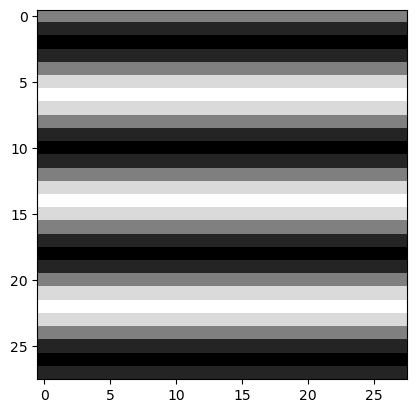

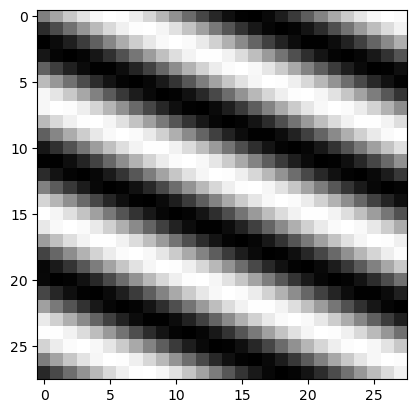

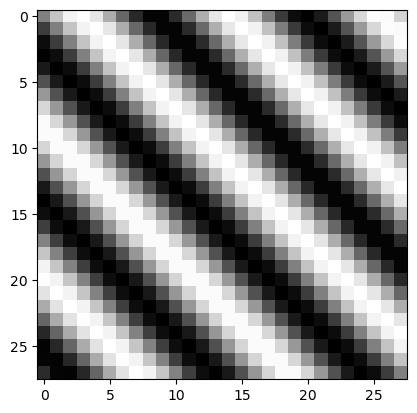

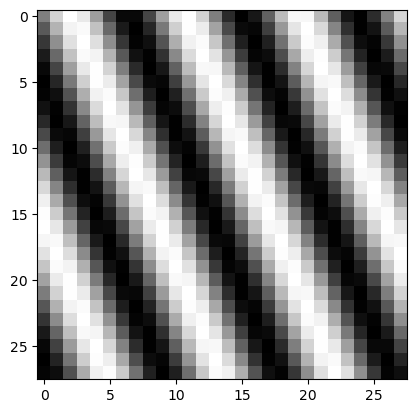

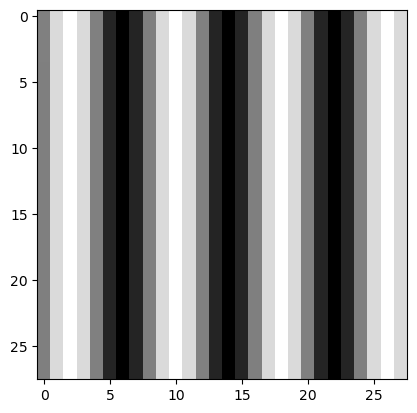

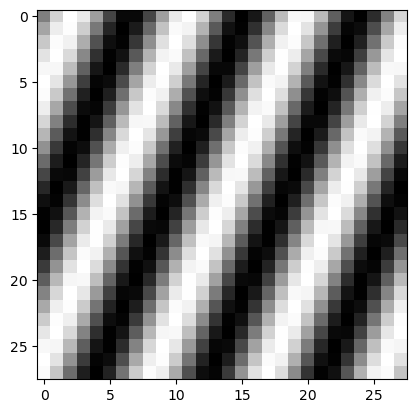

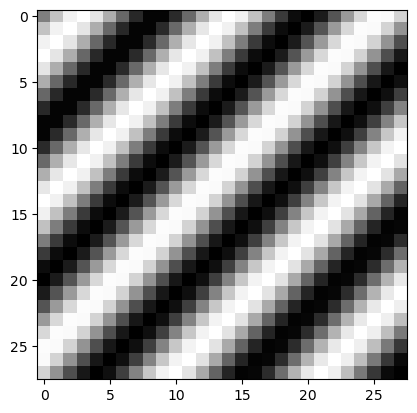

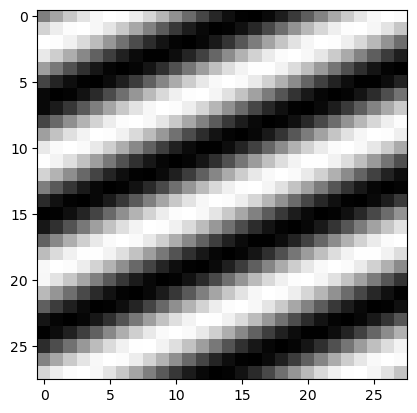

In [3]:
# code from https://www.baskrahmer.nl/blog/generating-gratings-in-python-using-numpy 
# Copyright Bas Krahmer

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal


def create_grating(sf, ori, phase, wave, imsize):
    """
    :param sf: spatial frequency (in pixels)
    :param ori: wave orientation (in degrees, [0-360])
    :param phase: wave phase (in degrees, [0-360])
    :param wave: type of wave ('sqr' or 'sin')
    :param imsize: image size (integer)
    :return: numpy array of shape (imsize, imsize)
    """
    # Get x and y coordinates
    x, y = np.meshgrid(np.arange(imsize), np.arange(imsize))

    # Get the appropriate gradient
    gradient = np.sin(ori * math.pi / 180) * x - np.cos(ori * math.pi / 180) * y

    # Plug gradient into wave function
    if wave == 'sin':
        grating = np.sin((2 * math.pi * gradient) / sf + (phase * math.pi) / 180)
    elif wave == 'sqr':
        grating = signal.square((2 * math.pi * gradient) / sf + (phase * math.pi) / 180)
    else:
        raise NotImplementedError

    return grating


orientations = np.arange(start=0, stop=180, step=22.5 )
data_set = []
for ori in orientations:
    img = create_grating(sf=8, ori=ori, phase=0, wave='sin', imsize=28, )
    data_set.append(img.flatten())
    plt.imshow(img, cmap="gray")
    plt.show()

In [4]:
180/8

22.5

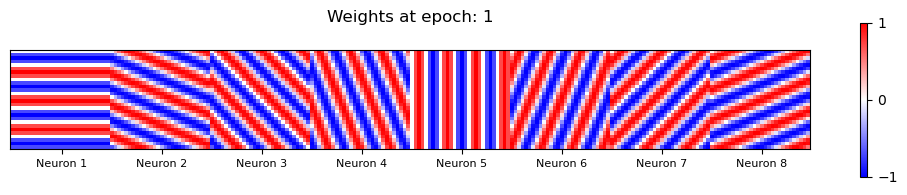

In [5]:
from utils import draw_weights
data_set = np.array(data_set)
data_set.shape
draw_weights(data_set, epoch=0)

In [6]:
data_set = np.array(data_set)
data_set.shape

data_set = np.tile(data_set, reps=(50,1))
data_set.shape

(400, 784)

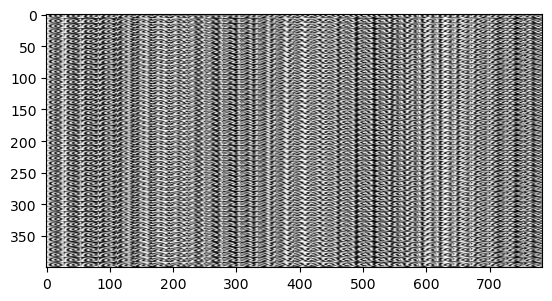

In [7]:
plt.imshow(data_set, cmap="gray")

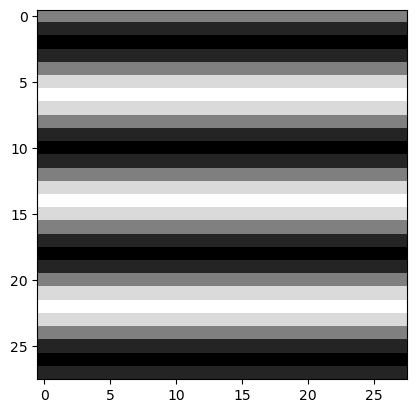

In [8]:
plt.imshow(data_set[0,:].reshape(28,28), cmap="gray")

In [9]:

np.savetxt("gratings.csv", data_set, delimiter=",")

In [10]:
test = np.loadtxt("gratings.csv", delimiter=",")
test

array([[ 0.        ,  0.        ,  0.        , ..., -0.70710678,
        -0.70710678, -0.70710678],
       [ 0.        ,  0.29605406,  0.56556462, ...,  0.46955215,
         0.70989022,  0.88658121],
       [ 0.        ,  0.52724954,  0.89601894, ..., -0.89601894,
        -0.52724954,  0.        ],
       ...,
       [ 0.        ,  0.66359436,  0.99286005, ...,  0.90126498,
         0.96174407,  0.53768224],
       [ 0.        ,  0.52724954,  0.89601894, ..., -0.56827276,
        -0.91670947, -0.98960255],
       [ 0.        ,  0.29605406,  0.56556462, ...,  0.92028312,
         0.76319584,  0.53768224]])